In [1]:
from autogluon.tabular import TabularDataset, TabularPredictor

c:\Users\kwitv\Documents\MARC\SOCprediction\venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
train_data = TabularDataset(f'Data/phil_rangedata_train.csv')
train_data.head()

,Initial SOC,Final SOC,Altitude Difference,Average Speed,Final Accumulated Distance
0,57.254921,21.960791,-101.433347,24.503334,88212.000811
1,64.705902,60.000019,11.512113,29.187576,17483.357208
2,100.000031,90.588264,-13.177577,15.333329,27599.991404
3,76.862770,69.803947,69.311413,28.583464,17122.847290
4,94.509834,87.058853,9.995479,29.182954,17480.970041


In [4]:
label = 'Final SOC'
train_data[label].describe()

count    1915.000000
mean       63.502306
std        24.679783
min        10.588239
25%        41.568642
50%        69.411789
75%        83.921593
max       100.000031
Name: Final SOC, dtype: float64

In [5]:
predictor = TabularPredictor(label=label).fit(train_data)

No path specified. Models will be saved in: "AutogluonModels\ag-20230327_021828\"
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels\ag-20230327_021828\"
AutoGluon Version:  0.7.0
Python Version:     3.10.10
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.22621
Train Data Rows:    1915
Train Data Columns: 4
Label Column: Final SOC
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (100.000030517578, 10.5882387161255, 63.50231, 24.67978)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    5900.05 MB
	Tra

[1000]	valid_set's rmse: 3.7861
[2000]	valid_set's rmse: 3.65116
[3000]	valid_set's rmse: 3.58998
[4000]	valid_set's rmse: 3.55434
[5000]	valid_set's rmse: 3.52824
[6000]	valid_set's rmse: 3.52127
[7000]	valid_set's rmse: 3.51649
[8000]	valid_set's rmse: 3.51486
[9000]	valid_set's rmse: 3.51262
[10000]	valid_set's rmse: 3.51184


	-3.5066	 = Validation score   (-root_mean_squared_error)
	7.99s	 = Training   runtime
	0.08s	 = Validation runtime
Fitting model: LightGBM ...
	-3.627	 = Validation score   (-root_mean_squared_error)
	0.75s	 = Training   runtime
	0.0s	 = Validation runtime
Fitting model: RandomForestMSE ...
	-3.3803	 = Validation score   (-root_mean_squared_error)
	0.69s	 = Training   runtime
	0.03s	 = Validation runtime
Fitting model: CatBoost ...
	-3.0082	 = Validation score   (-root_mean_squared_error)
	5.26s	 = Training   runtime
	0.0s	 = Validation runtime
Fitting model: ExtraTreesMSE ...
	-3.2105	 = Validation score   (-root_mean_squared_error)
	0.38s	 = Training   runtime
	0.04s	 = Validation runtime
Fitting model: NeuralNetFastAI ...
	-2.3162	 = Validation score   (-root_mean_squared_error)
	2.98s	 = Training   runtime
	0.01s	 = Validation runtime
Fitting model: XGBoost ...
	-3.2081	 = Validation score   (-root_mean_squared_error)
	0.59s	 = Training   runtime
	0.0s	 = Validation runtime
Fittin

In [6]:
test_data = TabularDataset(f'Data/phil_rangedata_test.csv')

y_pred = predictor.predict(test_data.drop(columns=[label]))
y_pred.head()

Loaded data from: Data/phil_rangedata_test.csv | Columns = 5 / 5 | Rows = 87 -> 87


0    78.692017
1    73.958427
2    58.172504
3    59.156990
4    67.039375
Name: Final SOC, dtype: float32

In [7]:
predictor.evaluate(test_data, silent=True)

c:\Users\kwitv\Documents\MARC\SOCprediction\venv\lib\site-packages\autogluon\tabular\predictor\predictor.py:1420: FutureWarning: Calling `predictor.predict_proba` when problem_type=regression will raise an AssertionError starting in AutoGluon v0.8. Please call `predictor.predict` instead.
  warnings.warn(


{'root_mean_squared_error': -5.518084946345717,
 'mean_squared_error': -30.44926147508722,
 'mean_absolute_error': -4.365169137810295,
 'r2': 0.943531096394585,
 'pearsonr': 0.9716800941600942,
 'median_absolute_error': -3.981117248535213}

In [8]:
predictor.leaderboard(test_data, silent=True)

,model,score_test,score_val,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,CatBoost,-4.987325,-3.008192,0.007979,0.003747,5.263363,0.007979,0.003747,5.263363,1,True,6
1,XGBoost,-5.492033,-3.208061,0.012964,0.002992,0.590198,0.012964,0.002992,0.590198,1,True,9
2,WeightedEnsemble_L2,-5.518085,-2.171455,0.035904,0.021699,16.118248,0.002992,0.000000,0.255534,2,True,12
3,NeuralNetTorch,-5.741044,-2.290318,0.006981,0.004988,7.616412,0.006981,0.004988,7.616412,1,True,10
4,ExtraTreesMSE,-5.772487,-3.210515,0.084232,0.037343,0.383927,0.084232,0.037343,0.383927,1,True,7
5,RandomForestMSE,-5.931594,-3.380332,0.079308,0.030920,0.691367,0.079308,0.030920,0.691367,1,True,5
6,LightGBMLarge,-6.088669,-3.548754,0.014965,0.002992,1.142214,0.014965,0.002992,1.142214,1,True,11
7,NeuralNetFastAI,-6.194452,-2.316176,0.017952,0.012964,2.982938,0.017952,0.012964,2.982938,1,True,8
8,LightGBMXT,-6.349523,-3.506552,0.141322,0.077308,7.992953,0.141322,0.077308,7.992953,1,True,3
9,LightGBM,-6.918836,-3.626971,0.015957,0.003990,0.752409,0.015957,0.003990,0.752409,1,True,4


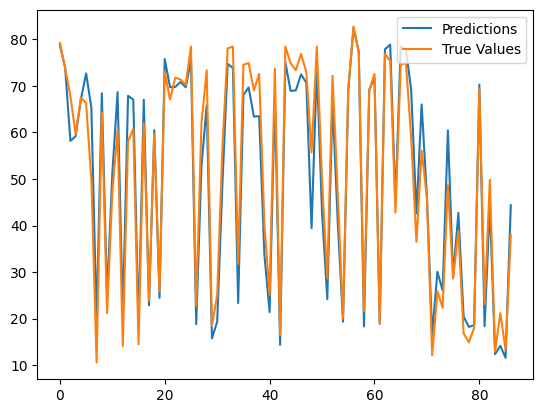

In [17]:
#plots the predicted vs actual values of the top performing model using matplotlib
import matplotlib.pyplot as plt
plt.plot(y_pred, label="Predictions")
plt.plot(test_data[label], label="True Values")
plt.legend()
plt.show()